# The Lindblad Master Equation for van der Pol Oscillator

The vdP oscillator's lindblad master equation is:
\begin{equation}
\begin{split}
\dot{\rho}&=\frac{1}{i\hbar}[H,\rho]\\
&-\frac{\gamma_1}{2}(1+\bar{n}(\omega))(a^\dagger a\rho+\rho a^\dagger a-2a\rho a^\dagger )-\frac{\gamma_1}{2}\bar{n}(\omega)(aa^\dagger\rho+\rho aa^\dagger-2a^\dagger\rho a)\\
&-\frac{\gamma_2}{2}(1+\bar{n}(2\omega))({a^\dagger}^2 a^2\rho+\rho {a^\dagger}^2 a^2-2a^2\rho {a^\dagger}^2)
-\frac{\gamma_2}{2}\bar{n}(2\omega)(a^2{a^\dagger}^2\rho+\rho a^2{a^\dagger}^2-2{a^\dagger}^2\rho a^2)\\
&-\frac{\kappa}{2}(1+\bar{n}(\Delta))(aa^\dagger \rho +\rho aa^\dagger-2a^\dagger\rho a)
-\frac{\kappa}{2}\bar{n}(\Delta)(a^\dagger a\rho+\rho a^\dagger a-2a\rho a^\dagger )
\end{split}
\end{equation}
where: 
* $\rho$ is the reduced density matrix.
* The Hamiltoian is $ H=\hbar\omega a^{\dagger} a $.
* $\bar{n}(\omega)$ represents the temperature dependence by $ \bar{n}(\omega)=(e^{\hbar\omega/k_B T}-1)^{-1}$. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip
import VdP

Define Constants:

In [2]:
N = VdP.N                     # num. of levels
tN = VdP.tN                   # number of time steps
gamma1 = 1                 # TODO
gamma2 = 0.5 # 0.1         # TODO
kappa  = [0, 1, 1.5, 2, 3]  # TODO
kappa2 = np.linspace(0, 3, 25)
nbar_omega = 0.1           # Temperature dependence
nbar_delta = 0.1           # Temperature dependence (of detuened pump)

Define the density matrix at time $t=0$ and plot it:

In [3]:
rho0 = qutip.fock_dm(N, 0)
# fig, ax = qutip.matrix_histogram(rho0)
# ax.set_title("Initial Density Matrix")
# plt.show()

Solve the lindblad equation to get $\rho(t)$ at a later time:

In [4]:
rho_arr = []
tlist = np.linspace(0.0, 20.0, tN)
for kap in kappa:
    rho_arr.append(VdP.solve_lindblad(gamma1, gamma2, nbar_omega, nbar_delta, kap, rho0, tlist))

Solve for many kappas:

In [5]:
rho_arr2 = []
for kap in kappa2:
    rho_arr2.append(VdP.solve_lindblad(gamma1, gamma2, nbar_omega, nbar_delta, kap, rho0, tlist))

Calculate position, momentum and phonon number expectation values:

In [6]:
adag = qutip.create(N)
a = adag.dag()

x = a + adag
p = -1j * (a - adag)

xres_arr = [0 for i in range(len(kappa))]
pres_arr = [0 for i in range(len(kappa))]
Nres_arr = [0 for i in range(len(kappa))]

for i,rho in enumerate(rho_arr):
    # calculate expectation values
    xres_arr[i], pres_arr[i], Nres_arr[i] = qutip.expect([x, p, adag*a], rho.states)

Plot fock states distribution:

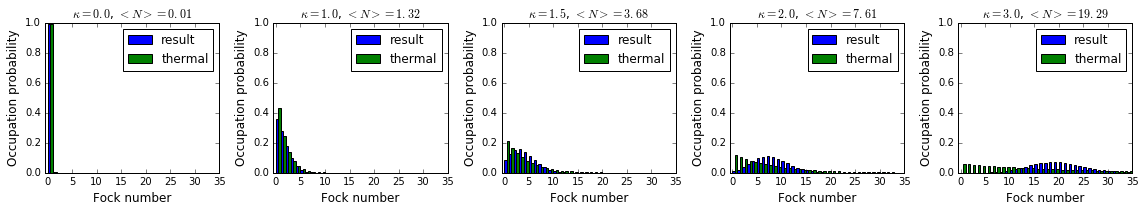

In [7]:
fig, axes = plt.subplots(1, len(kappa), figsize=(16,3))
width = 0.5
for i,rho in enumerate(rho_arr):
    # plot fock occupation distribution of solution
    axes[i].bar(np.arange(0,N), 
                rho.states[-1].diag(),
                width=width,
                label="result",
                color="blue"
               )
    
    
    # plot fock occupation distribution of thermal equilibrium
    axes[i].bar(np.arange(0,N)+width,
                qutip.thermal_dm(N, Nres_arr[i][-1]).diag(),
                width=width,
                label="thermal",
               color="green")
        
    # adjust graph
    axes[i].set_title('$\kappa=%.1f$, $<N>=%.2f$' % (kappa[i], Nres_arr[i][-1]))
    axes[i].set_ylim(0, 1)
    axes[i].set_xlim(-.5, N)
    axes[i].set_xlabel('Fock number', fontsize=12)
    axes[i].set_ylabel('Occupation probability', fontsize=12)
    axes[i].legend()
plt.tight_layout()
plt.show()

Plot another comparison of density matrices (top: the system's density matrix, bottom: thermal density matrix for different values of $<N>$):

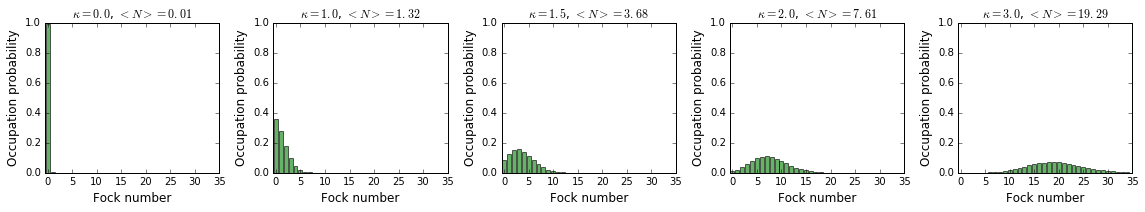

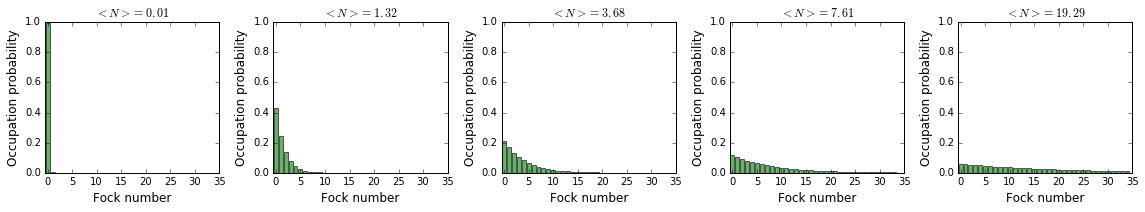

In [8]:
fig1, axes1 = plt.subplots(1, len(kappa), figsize=(16,3))
fig2, axes2 = plt.subplots(1, len(kappa), figsize=(16,3))
for i,rho in enumerate(rho_arr):
    qutip.plot_fock_distribution(rho.states[-1], fig=fig1, ax=axes1[i], title='$\kappa=%.1f$, $<N>=%.2f$' % (kappa[i], Nres_arr[i][-1]))
    qutip.plot_fock_distribution(qutip.thermal_dm(N, Nres_arr[i][-1]), fig=fig2, ax=axes2[i], title='$<N>=%.2f$' % Nres_arr[i][-1])
plt.figure(fig1.number)
plt.tight_layout()
plt.figure(fig2
.number)
plt.tight_layout()
plt.show()

Plot Wigner functions in 2D and 3D:

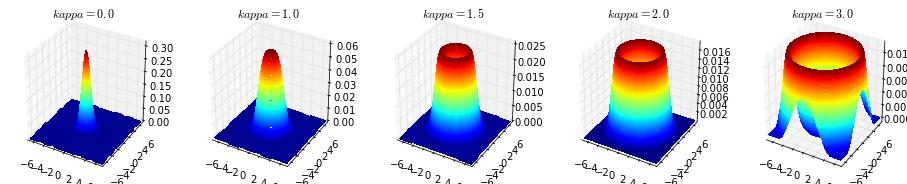

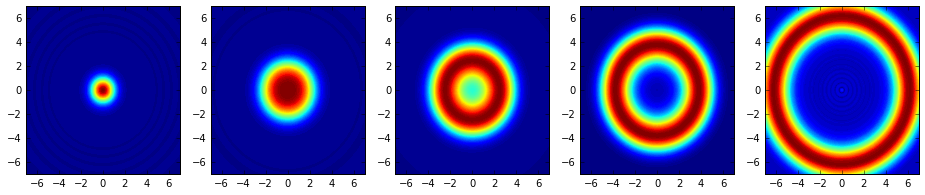

In [9]:
xvec = np.linspace(-7,7,200)
fig3, axes3 = plt.subplots(1, len(kappa), figsize=(16,3), subplot_kw={'projection':'3d'})
fig2, axes2 = plt.subplots(1, len(kappa), figsize=(16,3))
W = []
for i,rho in enumerate(rho_arr):
    # get wigner func
    W.append(qutip.wigner(rho.states[tN-1], xvec, xvec))
    # 3D
    cont = axes3[i].contourf(xvec, xvec, W[-1], 100)
    lbl = axes3[i].set_title('$kappa=%.1f$' % kappa[i])
    # 2D
    cont = axes2[i].contourf(xvec, xvec, W[-1], 100)
plt.show()

Plot position and momentum expectation values as function of time:

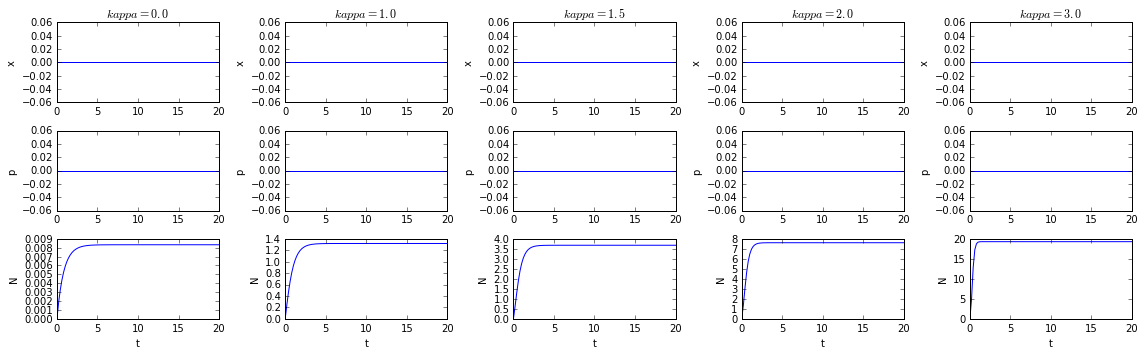

In [10]:
fig, axes = plt.subplots(3, len(kappa), figsize=(16,5))
for i,rho in enumerate(rho_arr):
    # plot it
    axes[0][i].plot(tlist, xres_arr[i])
    axes[1][i].plot(tlist, pres_arr[i])
    axes[2][i].plot(tlist, Nres_arr[i])
    axes[0][i].set_title('$kappa=%.1f$' % kappa[i])
    axes[0][i].set_ylabel('x')
    axes[1][i].set_ylabel('p')
    axes[2][i].set_ylabel('N')
    axes[2][i].set_xlabel('t')
plt.tight_layout()
plt.show()

Plot $<N>, <x>, <p>$ as function of $\kappa$:

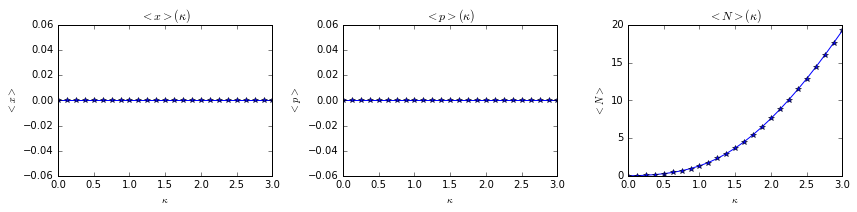

In [11]:
xres_arr2 = [0 for i in range(len(kappa2))]
pres_arr2 = [0 for i in range(len(kappa2))]
Nres_arr2 = [0 for i in range(len(kappa2))]

for i,rho in enumerate(rho_arr2):
    xres_arr2[i], pres_arr2[i], Nres_arr2[i] = qutip.expect([x, p, adag*a], rho.states[-1])

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax[0].plot(kappa2, xres_arr2, 'b*-')
ax[0].set_title("$<x>(\kappa)$")
ax[0].set_ylabel("$<x>$")
ax[0].set_xlabel("$\kappa$")
# ax[0].set_ylim([-0.25,0.01])

ax[1].plot(kappa2, pres_arr2, 'b*-')
ax[1].set_title("$<p>(\kappa)$")
ax[1].set_ylabel("$<p>$")
ax[1].set_xlabel("$\kappa$")

ax[2].plot(kappa2, Nres_arr2, 'b*-')
ax[2].set_title("$<N>(\kappa)$")
ax[2].set_ylabel("$<N>$")
ax[2].set_xlabel("$\kappa$")

plt.tight_layout()
plt.show()

Plot Wigner function with variables $\alpha$ and $\alpha^*$, with transformation:

$\alpha = $

TODO

Plot maximum of Wigner function for different values of $\kappa$:

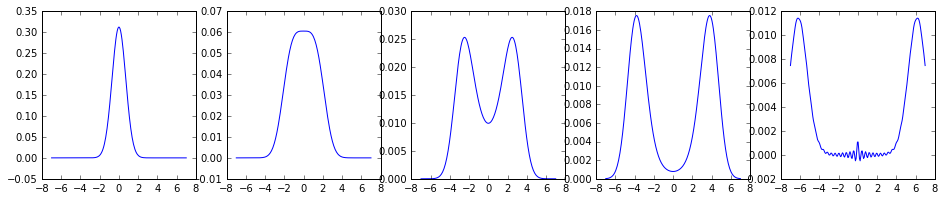

In [12]:
n0 = 100
fig, axes = plt.subplots(1, len(W), figsize=(16,3))
for i in range(len(W)):
    axes[i].plot(xvec, W[i][n0])
plt.show()

Plot maximum of Wigner function as function of $\kappa$ for different temperatures:

In [13]:
tlist = np.linspace(0.0, 20.0, tN)
nbar_omega = (0.1, 0.4, 0.7)
kappa = np.linspace(0, 1, 3)
kappa = np.append(kappa, np.linspace(1, 1.25, 10))
kappa = np.append(kappa, np.linspace(1.5, 3, 4))
rho0 = qutip.fock_dm(N, 0)

solved for nbar_omega=0.100000


/Users/nadavstiner/Google Drive/Research/Lifschitz/vdp-oscillator/VdP.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  max_pts.append(xvec[np.argmax(W[W.shape[0]/2])])


solved for nbar_omega=0.400000
solved for nbar_omega=0.700000


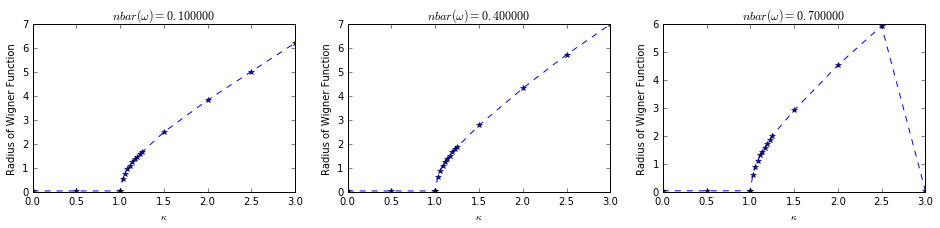

In [14]:
results = [[0 for j in kappa] for i in nbar_omega]
fig1, axes = plt.subplots(1, len(nbar_omega), figsize=(16, 3))
for i, nb in enumerate(nbar_omega):
    for j, kap in enumerate(kappa):
        results[i][j] = VdP.solve_lindblad(gamma1, gamma2, nb, nb, kap, rho0, tlist)
    print("solved for nbar_omega=%f" % nb)
    VdP.plot_max_W_func(kappa, nb, results[i], axes[i])

# plt.hold(True)
# plt.plot(kappa)
plt.show()